# **Modelos Supervisionados - Problemas de Classificação**

Lembrando que para chegar nesta etapa, já foi realizado preparação dos dados e Feature Selection

**10 principais algoritmos:**

- Árvores de Decisão
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Regressão Logística

- Random Forest

- LightGBM

- XGBoost

- CatBoost

- KNN

- Redes Neurais - MLP

- SVM

- Stacking e Blend de Modelos

- AutoML com Pycaret
---------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Vamos ler a tabela de modelagem pós aplicação da preparação de dados

In [ ]:

import pandas as pd
abt_00 = pd.read_csv('/content/drive/Shareddrives/PoD Academy/Cursos/Formação em Ciência de Dados/dados/Kaggle/Titanic/abt_titanic.csv',index_col=0)

abt_00.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,Survived
0,1.0,0.271174,0.125,0.0,523,0.014151,3,3,1.0,0
1,0.0,0.472229,0.125,0.0,596,0.139136,0,4,0.0,1
2,1.0,0.321438,0.000,0.0,669,0.015469,3,2,0.0,1
3,0.0,0.434531,0.125,0.0,49,0.103644,3,4,0.0,1
4,1.0,0.434531,0.000,0.0,472,0.015713,3,3,1.0,0


#### **Árvores de Decisão**

Construir uma Árvore de Decisão envolve uma série de passos sequenciais. Abaixo está o formalismo matemático detalhado e o processo passo a passo para a construção de uma Árvore de Decisão:

### Passo 1: Inicialização
- Comece com o nó raiz, que contém todo o conjunto de dados de treinamento.
- Calcule a impureza do nó raiz usando uma métrica de impureza, como o Índice Gini ou a Entropia.

### Passo 2: Avaliação de Divisões
Para cada nó:
- Para cada variável $X_i$ e para cada valor possível $v$ dessa variável no nó, avalie dividir o nó em dois sub-nós: um contendo as observações para as quais $X_i \leq v$ e outro contendo as observações para as quais $X_i > v$.
- Para cada divisão possível, calcule a impureza dos sub-nós resultantes e use-a para calcular a função de custo da divisão.

### Formalismo Matemático para a Função de Custo
Para o Índice Gini como métrica de impureza, a função de custo $C$ para uma divisão é:
$
C = \sum_{\text{nó}} \left( \frac{|D_{\text{nó}}|}{|D|} \times \text{Gini}(\text{nó}) \right)
$
Onde:
- $ |D_{\text{nó}}| $ é o número de observações no sub-nó.
- $ |D| $ é o número total de observações no nó pai.
- $ \text{Gini}(\text{nó}) = 1 - \sum (p_i)^2 $, sendo $p_i$ a proporção da classe $i$ no sub-nó.

### Passo 3: Escolha da Melhor Divisão
- Escolha a característica e o valor que fornecem o menor valor da função de custo, ou seja, a divisão que minimiza a impureza nos sub-nós resultantes, ponderada pelo tamanho dos sub-nós.
- Realize a divisão, criando dois novos sub-nós.

### Passo 4: Continuação ou Término
- Se um critério de parada for atendido para um nó (por exemplo, profundidade máxima alcançada, número mínimo de observações por nó, ou nó puro), declare-o como um nó folha e atribua a classe predominante como a classe de previsão do nó.
- Se o nó não é um nó folha, repita os passos 2 e 3 para cada sub-nó criado.

### Passo 5: Poda (Opcional)
- Após a construção completa da árvore, pode-se realizar a poda para remover ramos da árvore que não oferecem melhorias significativas na impureza, com base em um critério de custo-complexidade que penaliza a adição de nós à árvore.

Este processo constrói uma Árvore de Decisão que pode ser usada para fazer previsões em dados novos, não vistos, ao passar por cada divisão da árvore até atingir um nó folha, cuja classe predominante é a previsão da árvore.


---------------------------------

### 1. **Critério de Divisão:**
O objetivo é encontrar a variável e o ponto de divisão que resultam na melhor separação entre as classes. Para problemas de classificação, medidas como o Índice Gini ou a Entropia são comumente usadas.

#### a. **Índice Gini:**
O Índice Gini é uma medida de impureza. Para um nó $t$, ele é calculado como:

$
\text{Gini}(t) = 1 - \sum_{i=1}^{c} p_i^2
$

onde $p_i$ é a proporção da classe $i$ no nó $t$ e $c$ é o número de classes. O Índice Gini é 0 quando todas as observações em um nó são da mesma classe.

#### b. **Entropia:**
A Entropia é outra medida de impureza. Para um nó $t$, ela é calculada como:

$
\text{Entropia}(t) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$

onde $p_i$ é a proporção da classe $i$ no nó $t$.

### 2. **Ganho de Informação:**
Ao escolher a variável e o ponto de divisão, calcula-se o Ganho de Informação (para o critério de Entropia) ou a Redução do Gini (para o Índice Gini), que é a diferença entre a impureza do nó pai e a soma ponderada das impurezas dos nós filhos.

$
\text{Ganho de Informação} = \text{Entropia}(t) - \sum_{v \in \text{filhos}} \frac{|v|}{|t|} \text{Entropia}(v)
$

$
\text{Redução do Gini} = \text{Gini}(t) - \sum_{v \in \text{filhos}} \frac{|v|}{|t|} \text{Gini}(v)
$

### 3. **Processo de Construção:**
A árvore é construída de forma recursiva:
   - Para o nó atual, avalie todas as possíveis divisões (variáveis e pontos de corte) de acordo com o critério escolhido.
   - Escolha a divisão que maximiza o Ganho de Informação (ou minimiza o Índice Gini).
   - Repita o processo para cada nó filho até que um critério de parada seja atingido, como profundidade máxima da árvore ou número mínimo de observações por nó.

### 4. **Poda:**
Para evitar o overfitting, as árvores de decisão são frequentemente podadas. A poda envolve a remoção de sub-árvores, substituindo-as por nós folha, com base em critérios como o custo de complexidade, que equilibra a precisão da árvore nos dados de treinamento com a sua complexidade.

Este formalismo matemático oferece uma visão detalhada dos princípios subjacentes à construção de árvores de decisão e fornece uma base sólida para entender como esses modelos aprendem a partir dos dados.

#### Vamos treinar uma árvore para classificar os sobreviventes do Titanic

**As variáveis de entrada (features) são:**

- Pclass: Classe do passageiro.
- Age: Idade do passageiro.
- SibSp: Número de irmãos/cônjuges a bordo.
- Parch: Número de pais/filhos a bordo.
- Ticket: Número do bilhete.
- Fare: Tarifa paga.
- Embarked: Porto de embarque.
- Titulo: Título do passageiro.
- Sex_male: Sexo do passageiro (1 para masculino, 0 para feminino).

**E a variável resposta (target) é:**

Survived: 1 se o passageiro sobreviveu, 0 se não.

#### Separando vetores de dados
- Conjunto contendo apenas variáveis explicativas
- Conjunto contendo apenas o Target

In [ ]:
# Separando as variáveis de entrada (features) e de saída (target)
X_titanic = abt_00.drop(columns=["Survived"])
y_titanic = abt_00["Survived"]

#### Preparando amostra de teste: Holdout 70/30 (validação out-of-sample)

In [ ]:
# Separando uma amostra de 70% para treinar o modelo e 30% para testar o modelo
# Holdout 70/30 (out-of-sample)

from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_titanic,
                                                    y_titanic,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape

((623, 9), (268, 9))

Árvore de Decisão - Sklearn - Hiperparâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Verificando os hiperparâmetros do modelo DecisionTreeClassifier

**DecisionTreeClassifier**

  - criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
  - splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
  - max_depth=None,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
  - min_samples_split=2,  # Número mínimo de amostras necessárias para dividir um nó interno.
  - min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
  - min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
  - max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
  - random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
  - max_leaf_nodes=None,  # Número máximo de nós folha.
  - min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
  - class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.


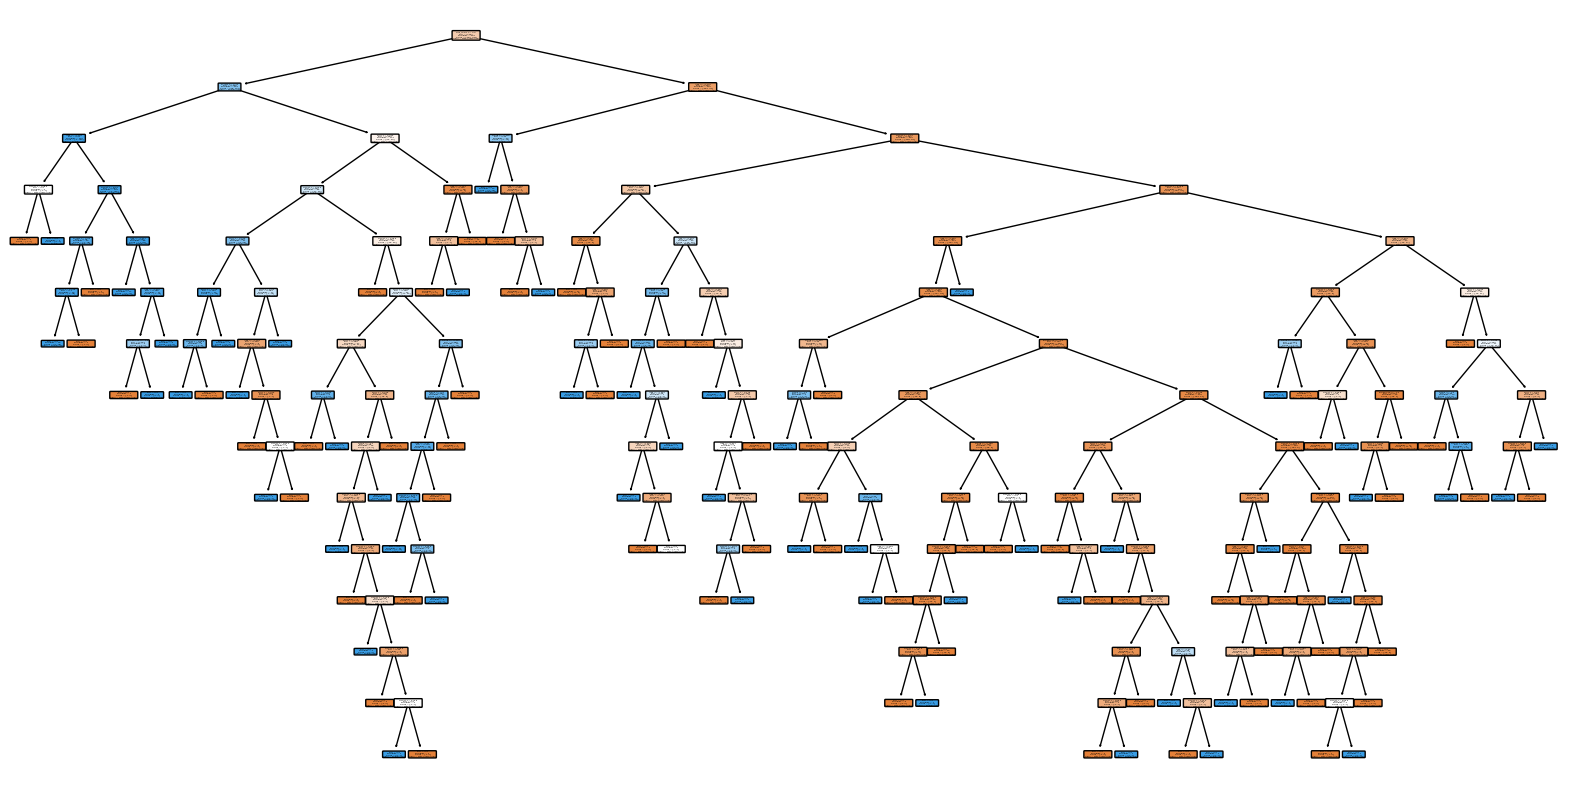

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Criando o modelo de Árvore de Decisão (árvore sem poda)
tree_model = DecisionTreeClassifier(random_state=42,max_depth=None)

# Treinando o modelo com os dados do Titanic
tree_model.fit(X_train, y_train)

# Plotando a Árvore de Decisão completa (aqui para fins didáticos, você não precisa fazer isso sempre nos projetos)
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_titanic.columns, class_names=['Não Sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.show()

# **Avaliação de Modelos de Classificação**
A avaliação de modelos de classificação é crucial para entender o desempenho e a aplicabilidade de um modelo em contextos específicos. Diferentes métricas oferecem insights variados sobre aspectos como a precisão, a sensibilidade e a especificidade do modelo em prever as classes. Selecionar métricas adequadas é essencial para garantir que o modelo atenda aos requisitos do problema em questão.

**1. Acurácia:**  
A acurácia é uma das métricas mais simples e é usada para encontrar a fração total de previsões corretas em relação ao total de observações.  
$ \text{Acurácia} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $

**2. Precisão:**  
A precisão é a razão entre os Positivos Verdadeiros e todos os exemplos classificados como classe positiva (Positivos Verdadeiros e Falsos Positivos).  
$ \text{Precisão} = \frac{\text{TP}}{\text{TP} + \text{FP}} $

**3. Recall (Sensibilidade):**  
O recall, ou sensibilidade, é a razão entre os Positivos Verdadeiros e todos os exemplos que são realmente da classe positiva (Positivos Verdadeiros e Falsos Negativos).  
$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $

**4. AUC-ROC:**  
A AUC-ROC é a área sob a curva ROC, que é um gráfico do Recall versus 1 - Especificidade para diferentes pontos de corte. Um modelo perfeito terá AUC = 1, enquanto um modelo aleatório terá AUC = 0.5. Não possui uma fórmula única, sendo geralmente calculada por métodos numéricos.

**5. Índice Gini:**  
O Índice Gini é uma métrica derivada da AUC-ROC e é utilizada para quantificar a desigualdade ou impureza de um modelo de classificação.  
$ \text{Índice Gini} = 2 \times \text{AUC} - 1 $

**6. Estatística KS (Kolmogorov-Smirnov):**  
A Estatística KS é a diferença máxima entre as funções de distribuição acumulada de eventos e não eventos, avaliando assim a capacidade de discriminação do modelo. Não possui uma fórmula única, sendo geralmente derivada a partir da análise da distribuição acumulada das probabilidades previstas.


Ao avaliar modelos de classificação, especialmente em problemas de classificação binária, usamos os termos "verdadeiro positivo", "falso positivo", "verdadeiro negativo" e "falso negativo" para avaliar o desempenho do modelo. Aqui estão as definições:

- **Verdadeiro Positivo (VP ou TP - True Positive):** Refere-se ao número de casos em que o modelo previu corretamente a classe positiva. Ou seja, tanto a previsão do modelo quanto o valor verdadeiro são positivos.

- **Falso Positivo (FP ou FP - False Positive):** Refere-se ao número de casos em que o modelo previu incorretamente a classe positiva. Ou seja, a previsão do modelo é positiva, mas o valor verdadeiro é negativo. Também é conhecido como "Erro Tipo I" ou "Falso Alarme".

- **Verdadeiro Negativo (VN ou TN - True Negative):** Refere-se ao número de casos em que o modelo previu corretamente a classe negativa. Ou seja, tanto a previsão do modelo quanto o valor verdadeiro são negativos.

- **Falso Negativo (FN ou FN - False Negative):** Refere-se ao número de casos em que o modelo previu incorretamente a classe negativa. Ou seja, a previsão do modelo é negativa, mas o valor verdadeiro é positivo. Também é conhecido como "Erro Tipo II" ou "Perda".

As métricas derivadas desses termos, como precisão, revocação (recall), acurácia e a pontuação F1, são comumente usadas para avaliar o desempenho de modelos de classificação.



In [ ]:
#### Verificando o modelo treinado
tree_model

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0


#### Processo de Escoragem dos dados utlizando modelo treinado

In [ ]:
#### Verificando uma predição feita pelo modelo
# Adicionando coluna de score (probabilidades) ao DataFrame de treino
score = tree_model.predict_proba(X_train)[:, 1]

# Adicionando coluna de classificação ao DataFrame de treino
classf = tree_model.predict(X_train)

X_train['prediction_1'] = score
X_train['class'] = classf

X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,prediction_1,class
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0,1.0,1
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0,0.0,0
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0,1.0,1
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0,0.0,0
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0,0.0,0


In [ ]:
#### Verificando uma predição feita pelo modelo agora na base de teste
# Adicionando coluna de score (probabilidades) ao DataFrame de treino
scoret = tree_model.predict_proba(X_test)[:, 1]

# Adicionando coluna de classificação ao DataFrame de treino
classft = tree_model.predict(X_test)

X_test['prediction_1'] = scoret
X_test['class'] = classft

X_test.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,prediction_1,class
709,1.0,0.367921,0.125,0.166667,189,0.029758,0,0,1.0,0.0,0
439,0.5,0.384267,0.000,0.000000,547,0.020495,3,3,1.0,0.0,0
840,1.0,0.246042,0.000,0.000000,647,0.015469,3,3,1.0,1.0,1
720,0.5,0.070118,0.000,0.166667,155,0.064412,3,2,0.0,1.0,1
39,1.0,0.170646,0.125,0.000000,186,0.021942,0,2,0.0,0.0,0


#### Avaliação do Modelo de Classificação

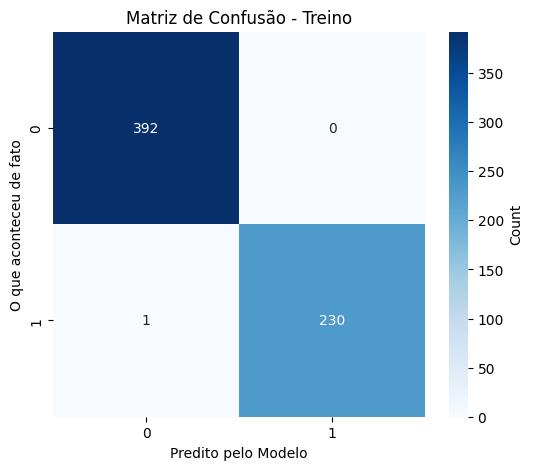

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predições
y_train_pred = classf
y_test_pred = classft

# Calculando a Matriz de Confusão para o conjunto de treino
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plotando a Matriz de Confusão
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.xlabel('Predito pelo Modelo')
plt.ylabel('O que aconteceu de fato')
plt.title('Matriz de Confusão - Treino')
plt.show()

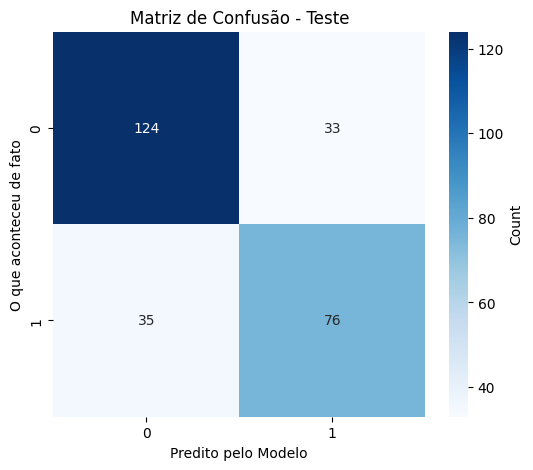

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predições
y_train_pred = classf
y_test_pred = classft

# Calculando a Matriz de Confusão para o conjunto de teste
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotando a Matriz de Confusão
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.xlabel('Predito pelo Modelo')
plt.ylabel('O que aconteceu de fato')
plt.title('Matriz de Confusão - Teste')
plt.show()


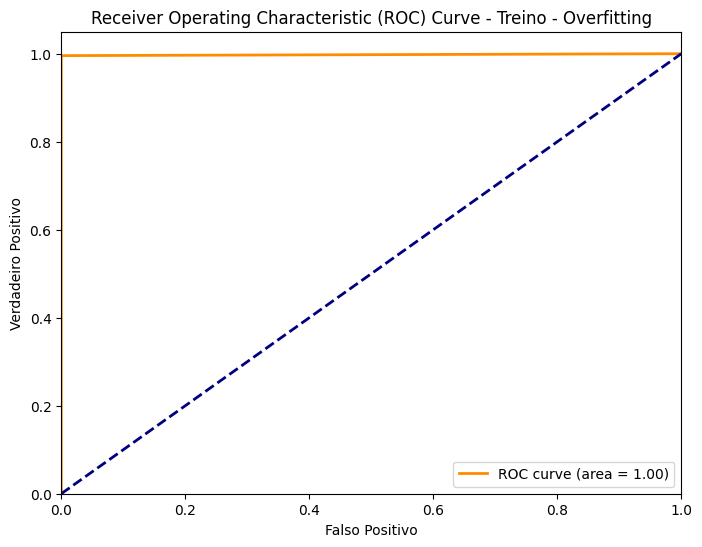

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculando a curva ROC e a área sob a curva para o conjunto de treino
fpr, tpr, _ = roc_curve(y_train, classf)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (ROC) Curve - Treino - Overfitting')
plt.legend(loc='lower right')
plt.show()

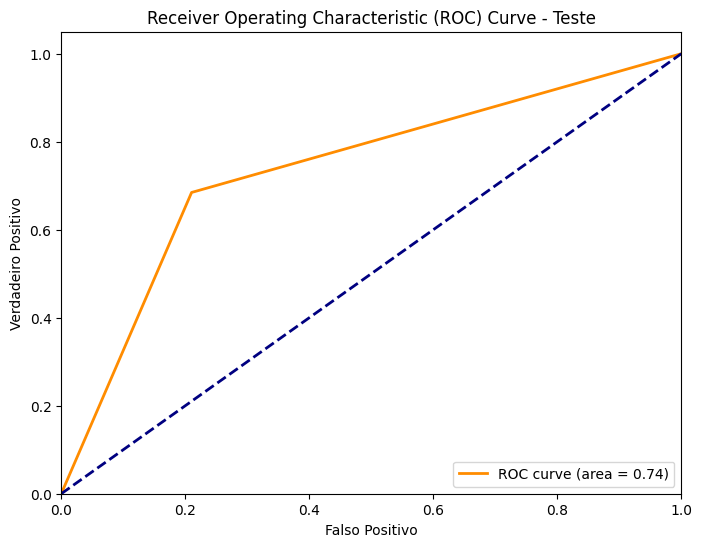

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculando a curva ROC e a área sob a curva para o conjunto de teste
fpr, tpr, _ = roc_curve(y_test, classft)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (ROC) Curve - Teste')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_titanic,
                                                    y_titanic,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Retreinando a árvore de decisão sem poda (apenas para fins didáticos, o correto é podar a árvore)
model_unpruned = DecisionTreeClassifier(random_state=42)
model_unpruned.fit(X_train, y_train)

# Predições
y_train_pred = model_unpruned.predict(X_train)
y_test_pred = model_unpruned.predict(X_test)


# Calculando as métricas para o conjunto de treino
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
auc_roc_train = roc_auc_score(y_train, model_unpruned.predict_proba(X_train)[:, 1])

# Índice Gini e Estatística KS para o conjunto de treino
probabilities_train = model_unpruned.predict_proba(X_train)[:, 1]
df_train = pd.DataFrame({'true_labels': y_train, 'predicted_probs': probabilities_train})
df_train = df_train.sort_values(by='predicted_probs', ascending=False)
df_train['cumulative_true'] = df_train['true_labels'].cumsum() / df_train['true_labels'].sum()
df_train['cumulative_false'] = (1 - df_train['true_labels']).cumsum() / (1 - df_train['true_labels']).sum()
ks_statistic_train = max(abs(df_train['cumulative_true'] - df_train['cumulative_false']))
gini_index_train = 2 * auc_roc_train - 1


# Calculando as métricas para o conjunto de teste
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, model_unpruned.predict_proba(X_test)[:, 1])

# Índice Gini
gini_index = 2 * auc_roc - 1

# Estatística KS
probabilities = model_unpruned.predict_proba(X_test)[:, 1]
df = pd.DataFrame({'true_labels': y_test, 'predicted_probs': probabilities})
df = df.sort_values(by='predicted_probs', ascending=False)
df['cumulative_true'] = df['true_labels'].cumsum() / df['true_labels'].sum()
df['cumulative_false'] = (1 - df['true_labels']).cumsum() / (1 - df['true_labels']).sum()
ks_statistic = max(abs(df['cumulative_true'] - df['cumulative_false']))

# Criando o DataFrame
metrics_df = pd.DataFrame({
    'Algoritmo': ['Árvore de Decisão (Sem Poda)', 'Árvore de Decisão (Sem Poda)'],
    'Conjunto': ['Treino', 'Teste'],
    'Acurácia': [accuracy_train, accuracy],
    'Precisão': [precision_train, precision],
    'Recall': [recall_train, recall],
    'AUC-ROC': [auc_roc_train, auc_roc],
    'Índice Gini': [gini_index_train, gini_index],
    'Estatística KS': [ks_statistic_train, ks_statistic]
})

metrics_df


,Algoritmo,Conjunto,Acurácia,Precisão,Recall,AUC-ROC,Índice Gini,Estatística KS
0,Árvore de Decisão (Sem Poda),Treino,0.998395,1.000000,0.995671,0.999994,0.999989,0.997449
1,Árvore de Decisão (Sem Poda),Teste,0.746269,0.697248,0.684685,0.739800,0.479601,0.486142


## A medida que a árvore vai crescendo, ela vai "decorando" os dados, por isso é importante "podar" a árvore no seu treinamento

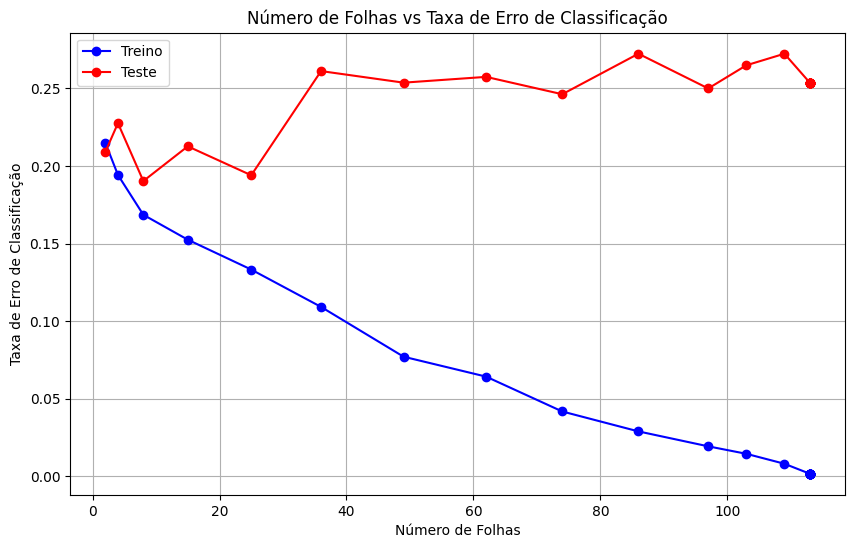

In [ ]:
# Treinando árvores de decisão com diferentes profundidades máximas e calculando o número de folhas e o erro
# Listas para armazenar o número de folhas e as taxas de erro de classificação para treino e teste de cada árvore
num_leaves_list = []
error_train_list = []
error_test_list = []
from sklearn.metrics import accuracy_score

for max_depth in range(1, 30):  # Considerando árvores de profundidade de 1 a 29
    # Treinando a árvore de decisão com profundidade máxima 'max_depth'
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Calculando o número de folhas da árvore treinada
    num_leaves = model.get_n_leaves()

    # Calculando a taxa de erro de classificação para o conjunto de treino
    y_train_pred = model.predict(X_train)
    error_train = 1 - accuracy_score(y_train, y_train_pred)

    # Calculando a taxa de erro de classificação para o conjunto de teste
    y_test_pred = model.predict(X_test)
    error_test = 1 - accuracy_score(y_test, y_test_pred)

    # Adicionando os resultados às listas
    num_leaves_list.append(num_leaves)
    error_train_list.append(error_train)
    error_test_list.append(error_test)

# Plotando o gráfico do número de folhas vs Taxa de Erro de Classificação para treino e teste
plt.figure(figsize=(10,6))
plt.plot(num_leaves_list, error_train_list, marker='o', label='Treino', color='blue')
plt.plot(num_leaves_list, error_test_list, marker='o', label='Teste', color='red')
plt.title('Número de Folhas vs Taxa de Erro de Classificação')
plt.xlabel('Número de Folhas')
plt.ylabel('Taxa de Erro de Classificação')
plt.legend()
plt.grid(True)
plt.show()

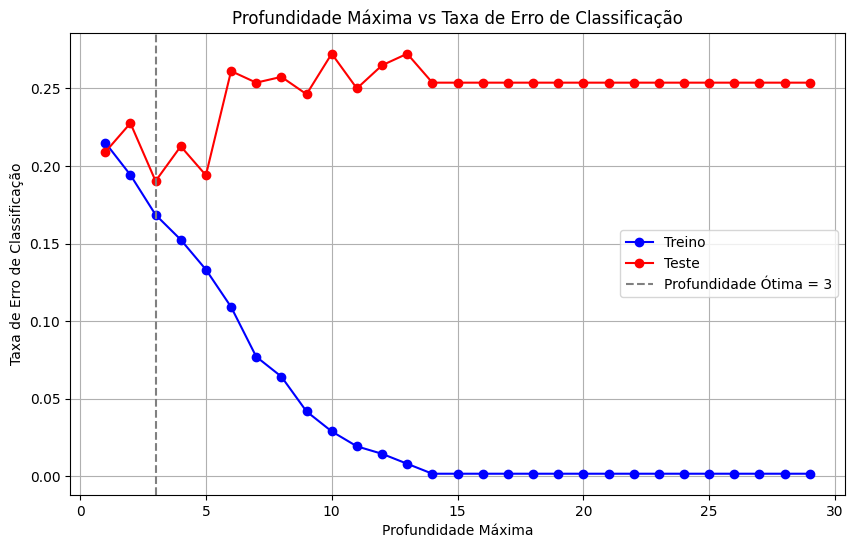

In [ ]:
# Treinando árvores de decisão com diferentes profundidades máximas e calculando o erro
# Listas para armazenar as profundidades e as taxas de erro de classificação para treino e teste de cada árvore
depths_list = list(range(1, 30))
error_train_list = []
error_test_list = []
for max_depth in depths_list:
    # Treinando a árvore de decisão com profundidade máxima 'max_depth'
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Calculando a taxa de erro de classificação para o conjunto de treino
    y_train_pred = model.predict(X_train)
    error_train = 1 - accuracy_score(y_train, y_train_pred)

    # Calculando a taxa de erro de classificação para o conjunto de teste
    y_test_pred = model.predict(X_test)
    error_test = 1 - accuracy_score(y_test, y_test_pred)

    # Adicionando os resultados às listas
    error_train_list.append(error_train)
    error_test_list.append(error_test)

# Encontrando a profundidade onde o erro de teste é mínimo (ponto de inflexão)
min_error_test = min(error_test_list)
optimal_depth = depths_list[error_test_list.index(min_error_test)]

# Plotando o gráfico da profundidade máxima vs Taxa de Erro de Classificação para treino e teste
plt.figure(figsize=(10,6))
plt.plot(depths_list, error_train_list, marker='o', label='Treino', color='blue')
plt.plot(depths_list, error_test_list, marker='o', label='Teste', color='red')
plt.axvline(optimal_depth, color='grey', linestyle='--', label=f'Profundidade Ótima = {optimal_depth}')
plt.title('Profundidade Máxima vs Taxa de Erro de Classificação')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Taxa de Erro de Classificação')
plt.legend()
plt.grid(True)
plt.show()

#### Agora vamos "podar" a árvore

In [ ]:
# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste) - so para relembrar
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
    splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
    max_depth=3,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
    min_samples_split=0.2,  # Número mínimo de amostras necessárias para dividir um nó interno.
    min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
    min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
    max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
    random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
    max_leaf_nodes=None,  # Número máximo de nós folha.
    min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
    class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=0.2)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

def calculate_metrics(nm_modelo, model, X_train, y_train, X_test, y_test):
    # Fazendo predições
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculando as métricas para o conjunto de treino
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    auc_roc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Calculando o Índice Gini e Estatística KS para o conjunto de treino
    probabilities_train = model.predict_proba(X_train)[:, 1]
    df_train = pd.DataFrame({'true_labels': y_train, 'predicted_probs': probabilities_train})
    df_train = df_train.sort_values(by='predicted_probs', ascending=False)
    df_train['cumulative_true'] = df_train['true_labels'].cumsum() / df_train['true_labels'].sum()
    df_train['cumulative_false'] = (1 - df_train['true_labels']).cumsum() / (1 - df_train['true_labels']).sum()
    ks_statistic_train = max(abs(df_train['cumulative_true'] - df_train['cumulative_false']))
    gini_index_train = 2 * auc_roc_train - 1

    # Calculando as métricas para o conjunto de teste
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    auc_roc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calculando o Índice Gini e Estatística KS para o conjunto de teste
    probabilities_test = model.predict_proba(X_test)[:, 1]
    df_test = pd.DataFrame({'true_labels': y_test, 'predicted_probs': probabilities_test})
    df_test = df_test.sort_values(by='predicted_probs', ascending=False)
    df_test['cumulative_true'] = df_test['true_labels'].cumsum() / df_test['true_labels'].sum()
    df_test['cumulative_false'] = (1 - df_test['true_labels']).cumsum() / (1 - df_test['true_labels']).sum()
    ks_statistic_test = max(abs(df_test['cumulative_true'] - df_test['cumulative_false']))
    gini_index_test = 2 * auc_roc_test - 1

    # Criando o DataFrame com as métricas calculadas
    metrics_df = pd.DataFrame({
        'Algoritmo': [nm_modelo, nm_modelo],
        'Conjunto': ['Treino', 'Teste'],
        'Acuracia': [accuracy_train, accuracy_test],
        'Precisao': [precision_train, precision_test],
        'Recall': [recall_train, recall_test],
        'AUC_ROC': [auc_roc_train, auc_roc_test],
        'GINI': [gini_index_train, gini_index_test],
        'KS': [ks_statistic_train, ks_statistic_test]
    })

    return metrics_df


# Uso da função
metrics_df = calculate_metrics('DecisionTreeClassifier',model_dt, X_train, y_train, X_test, y_test)
metrics_df


,Algoritmo,Conjunto,Acuracia,Precisao,Recall,AUC_ROC,GINI,KS
0,DecisionTreeClassifier,Treino,0.805778,0.923077,0.519481,0.845470,0.690940,0.588667
1,DecisionTreeClassifier,Teste,0.772388,0.890625,0.513514,0.853675,0.707351,0.625007


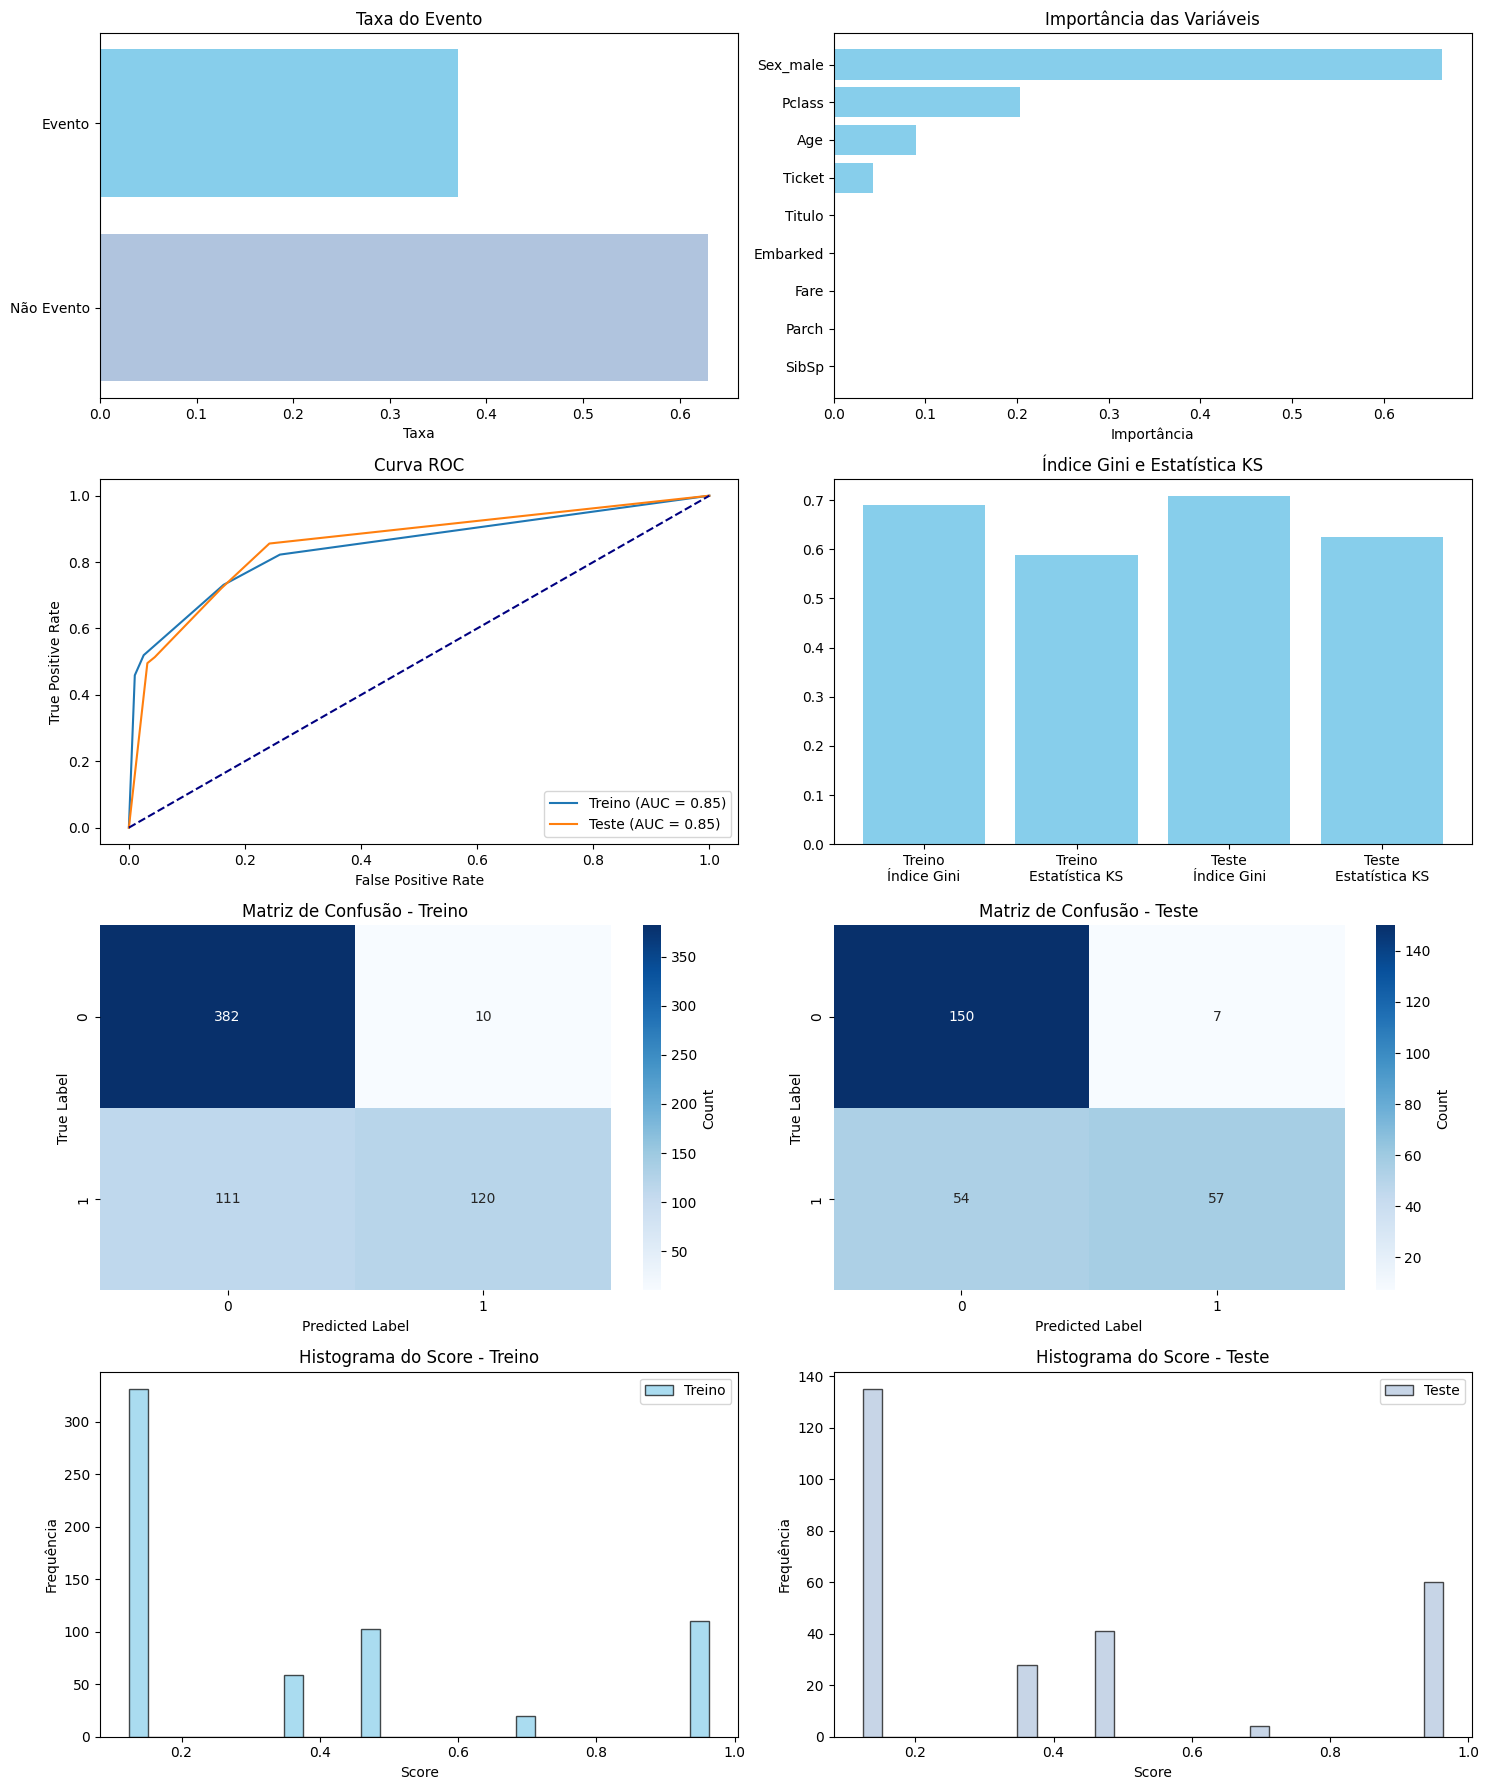

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_metrics(model, X_train, y_train, X_test, y_test, features):
    plt.figure(figsize=(15, 18))

    # Gráfico de Barras para Taxa do Evento e Importância das Variáveis
    plt.subplot(4, 2, 1)
    event_rate = y_train.mean()
    non_event_rate = 1 - event_rate
    plt.barh(['Não Evento', 'Evento'], [non_event_rate, event_rate], color=['lightsteelblue', 'skyblue'])
    plt.xlabel('Taxa')
    plt.title('Taxa do Evento')

    plt.subplot(4, 2, 2)
    importances = model.feature_importances_
    indices = np.argsort(importances)  # Ordem ascendente
    indices = indices[-10:]  # Considerando apenas as 10 mais importantes
    plt.barh(features[indices], importances[indices], color='skyblue')
    plt.xlabel('Importância')
    plt.title('Importância das Variáveis')

    # Curva ROC para Treino e Teste
    plt.subplot(4, 2, 3)
    for X, y, label in [(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]:
        fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

    # Gráfico de Barras para Gini e KS
    plt.subplot(4, 2, 4)
    metrics = ['Índice Gini', 'Estatística KS']
    for X, y, label in [(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]:
        probs = model.predict_proba(X)[:, 1]
        df = pd.DataFrame({'true_labels': y, 'predicted_probs': probs})
        df = df.sort_values(by='predicted_probs', ascending=False)
        df['cumulative_true'] = df['true_labels'].cumsum() / df['true_labels'].sum()
        df['cumulative_false'] = (1 - df['true_labels']).cumsum() / (1 - df['true_labels']).sum()
        ks = max(abs(df['cumulative_true'] - df['cumulative_false']))
        gini = 2 * auc(*roc_curve(y, probs)[:2]) - 1
        plt.bar([f'{label}\n{metric}' for metric in metrics], [gini, ks], color='skyblue')
    plt.title('Índice Gini e Estatística KS')

    # Matrizes de Confusão para Treino e Teste
    for i, (X, y, label) in enumerate([(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')], 5):
        plt.subplot(4, 2, i)
        conf_matrix = confusion_matrix(y, model.predict(X))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusão - {label}')

    # Histograma do Score para Treino e Teste
    plt.subplot(4, 2, 7)
    plt.hist(model.predict_proba(X_train)[:, 1], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Treino')
    plt.xlabel('Score')
    plt.ylabel('Frequência')
    plt.title('Histograma do Score - Treino')
    plt.legend(loc='upper right')

    plt.subplot(4, 2, 8)
    plt.hist(model.predict_proba(X_test)[:, 1], bins=30, color='lightsteelblue', edgecolor='black', alpha=0.7, label='Teste')
    plt.xlabel('Score')
    plt.ylabel('Frequência')
    plt.title('Histograma do Score - Teste')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Uso da função
import numpy as np
features = np.array(X_train.columns)
plot_metrics(model_dt, X_train, y_train, X_test, y_test,features)


In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0


In [ ]:
# Vamos escorar a abt de treino e abt de teste

X_train['prediction_1'] = model_dt.predict_proba(X_train)[:, 1]
X_test['prediction_1'] = model_dt.predict_proba(X_test)[:, 1]

X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,prediction_1
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0,0.700000
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0,0.123867
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0,0.475728
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0,0.123867
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0,0.123867


In [ ]:
# Fazer o inner join pelo index
abt_train = X_train.join(abt_00[['Survived']], how='inner')
abt_test = X_test.join(abt_00[['Survived']], how='inner')
abt_train.shape,abt_test.shape

((623, 11), (268, 11))

In [ ]:
abt_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,prediction_1,Survived
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0,0.700000,1
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0,0.123867,0
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0,0.475728,1
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0,0.123867,0
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0,0.123867,0


### Verificando ordenação do Score

Quando utilizado a função pd.cut() para categorizar uma variável contínua, por padrão, os bins são criados de forma que o Bin 1 contém os menores valores da variável e o último bin (neste exemplo, Bin 10) contém os maiores valores da variável, no caso prediction_1.

A função `pd.cut` do pandas é usada para segmentar e classificar valores de dados em compartimentos discretos, ou "bins". É muito útil quando você deseja converter uma variável contínua em categorias discretas.

### Parâmetros Principais:
1. **x**: array-like  
   - O array de entrada que você deseja cortar.
   
2. **bins**: int, sequence of scalars, or IntervalIndex  
   - Define os critérios de binning. Se `bins` for um inteiro, define o número de bins iguais a serem criados no intervalo dos dados. Se `bins` for uma sequência, define os limites dos bins.
   
3. **right**: bool, default True  
   - Indica se os intervalos são fechados à direita.
   
4. **labels**: array ou bool, opcional  
   - Usado como rótulos para os bins resultantes. Deve ter o mesmo comprimento que o resultado do binning.
   
5. **include_lowest**: bool, default False  
   - Se True, o primeiro intervalo incluirá o valor mais baixo dos dados.



#### Exemplo de categorização de variáveos com cut

- "Baixo" para valores entre 0 e 3 (inclusivo)
- "Médio" para valores entre 3 e 6 (não inclusivo no 3 se right=True)
- "Alto" para valores entre 6 e 10 (não inclusivo no 6 se right=True)

In [ ]:
import pandas as pd

data = [1, 7, 5, 4, 6, 3]
bins = [0, 3, 6, 10]

cut_data = pd.cut(data, bins, labels=["Baixo", "Médio", "Alto"])

cut_data

['Baixo', 'Alto', 'Médio', 'Médio', 'Médio', 'Baixo']
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']

Se você não especificar os ranges de valores (ou seja, se você passar um inteiro para o argumento `bins`), a função `pd.cut` divide o intervalo de valores da variável contínua em compartimentos (bins) de larguras iguais.

### Exemplo:

Vamos considerar a seguinte lista de números:

```python
data = [1, 7, 5, 4, 6, 3]
```

Se você usar `pd.cut` com `bins=3`, a função irá:

1. Encontrar o valor mínimo (`min`) e o valor máximo (`max`) da lista de dados.
2. Calcular a largura de cada bin como $(max - min) / bins$.
3. Criar `bins` intervalos de largura igual começando de `min` e terminando em `max`.

Para o exemplo dado:

1. Valor mínimo, $ \text{{min}} = 1 $
2. Valor máximo, $ \text{{max}} = 7 $
3. Largura de cada bin seria $ (7 - 1) / 3 \approx 2 $

Logo, os intervalos (bins) seriam aproximadamente:
- Bin 1: [1, 3)
- Bin 2: [3, 5)
- Bin 3: [5, 7)

### Exemplo de Código:
```python
import pandas as pd

data = [1, 7, 5, 4, 6, 3]
cut_data = pd.cut(data, bins=3)

print(cut_data)
```

### Saída:
```
[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]
```

Aqui, `pd.cut` dividiu os dados em três bins de larguras iguais e atribuiu cada valor ao bin correspondente.

In [ ]:
X_train['Idade_Categ'] = pd.cut(X_train['Age'], bins=3, labels=['Bin_1','Bin_2','Bin_3'])
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,prediction_1,Idade_Categ
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0,0.700000,Bin_1
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0,0.123867,Bin_2
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0,0.475728,Bin_1
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0,0.123867,Bin_2
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0,0.123867,Bin_2


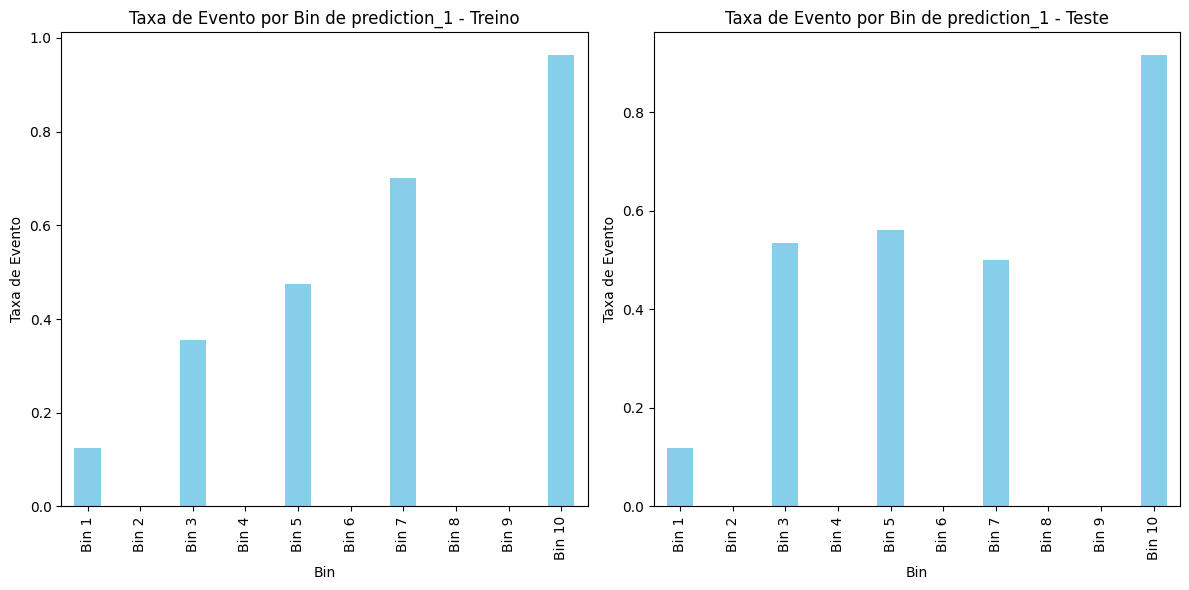

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_event_rate(train_df, test_df, continuous_var, bins, target_var):
    plt.figure(figsize=(12,6))

    for i, df in enumerate([(train_df, 'Treino'), (test_df, 'Teste')], 1):
        df, label = df
        df['bin'] = pd.cut(df[continuous_var], bins=bins, labels=[f'Bin {i}' for i in range(1, bins + 1)])

        # Calculando a taxa de evento por bin
        event_rate = df.groupby('bin')[target_var].mean()

        # Plotando o gráfico de barras
        plt.subplot(1, 2, i)
        event_rate.plot(kind='bar', color='skyblue')
        plt.ylabel('Taxa de Evento')
        plt.xlabel('Bin')
        plt.title(f'Taxa de Evento por Bin de {continuous_var} - {label}')

    plt.tight_layout()
    plt.show()

plot_event_rate(abt_train, abt_test, 'prediction_1', 10, 'Survived')


In [ ]:
X_train.drop(axis=1,columns='prediction_1',inplace=True)
X_test.drop(axis=1,columns='prediction_1',inplace=True)

In [ ]:
X_test.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male
709,1.0,0.367921,0.125,0.166667,189,0.029758,0,0,1.0
439,0.5,0.384267,0.000,0.000000,547,0.020495,3,3,1.0
840,1.0,0.246042,0.000,0.000000,647,0.015469,3,3,1.0
720,0.5,0.070118,0.000,0.166667,155,0.064412,3,2,0.0
39,1.0,0.170646,0.125,0.000000,186,0.021942,0,2,0.0


#### Voltando ao treinamento do Modelo, quais são os melhores hiperparâmetros ?

Para descrobrir vamos utilizar a busca em grade (Grid Search)

O GridSearchCV do Scikit-Learn é uma ferramenta poderosa que permite buscar automaticamente os melhores parâmetros para um modelo, com base em uma métrica de desempenho definida. Para uma árvore de decisão, você pode querer ajustar parâmetros como a profundidade máxima da árvore (max_depth), o número mínimo de amostras necessárias para dividir um nó interno (min_samples_split), e o número mínimo de amostras necessárias para estar em um nó folha (min_samples_leaf), entre outros.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definindo o modelo
model = DecisionTreeClassifier(random_state=42)


############### Para lembrar os parâmetros da árvore ###########################
# model_dt = DecisionTreeClassifier(
#     criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
#     splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
#     max_depth=3,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
#     min_samples_split=0.2,  # Número mínimo de amostras necessárias para dividir um nó interno.
#     min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
#     min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
#     max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
#     random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
#     max_leaf_nodes=None,  # Número máximo de nós folha.
#     min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
#     class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
# )
################################################################################


# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2,3,4,7,10], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04,0.07, 0.1], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04,0.07,0.1], # Número mínimo de amostras necessárias para estar em um nó folha.
}

# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_dt = grid.best_estimator_



Total de Modelos a serem Treinados: 3000
Melhores Parâmetros:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 0.04, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor AUC:  0.8645104608502893


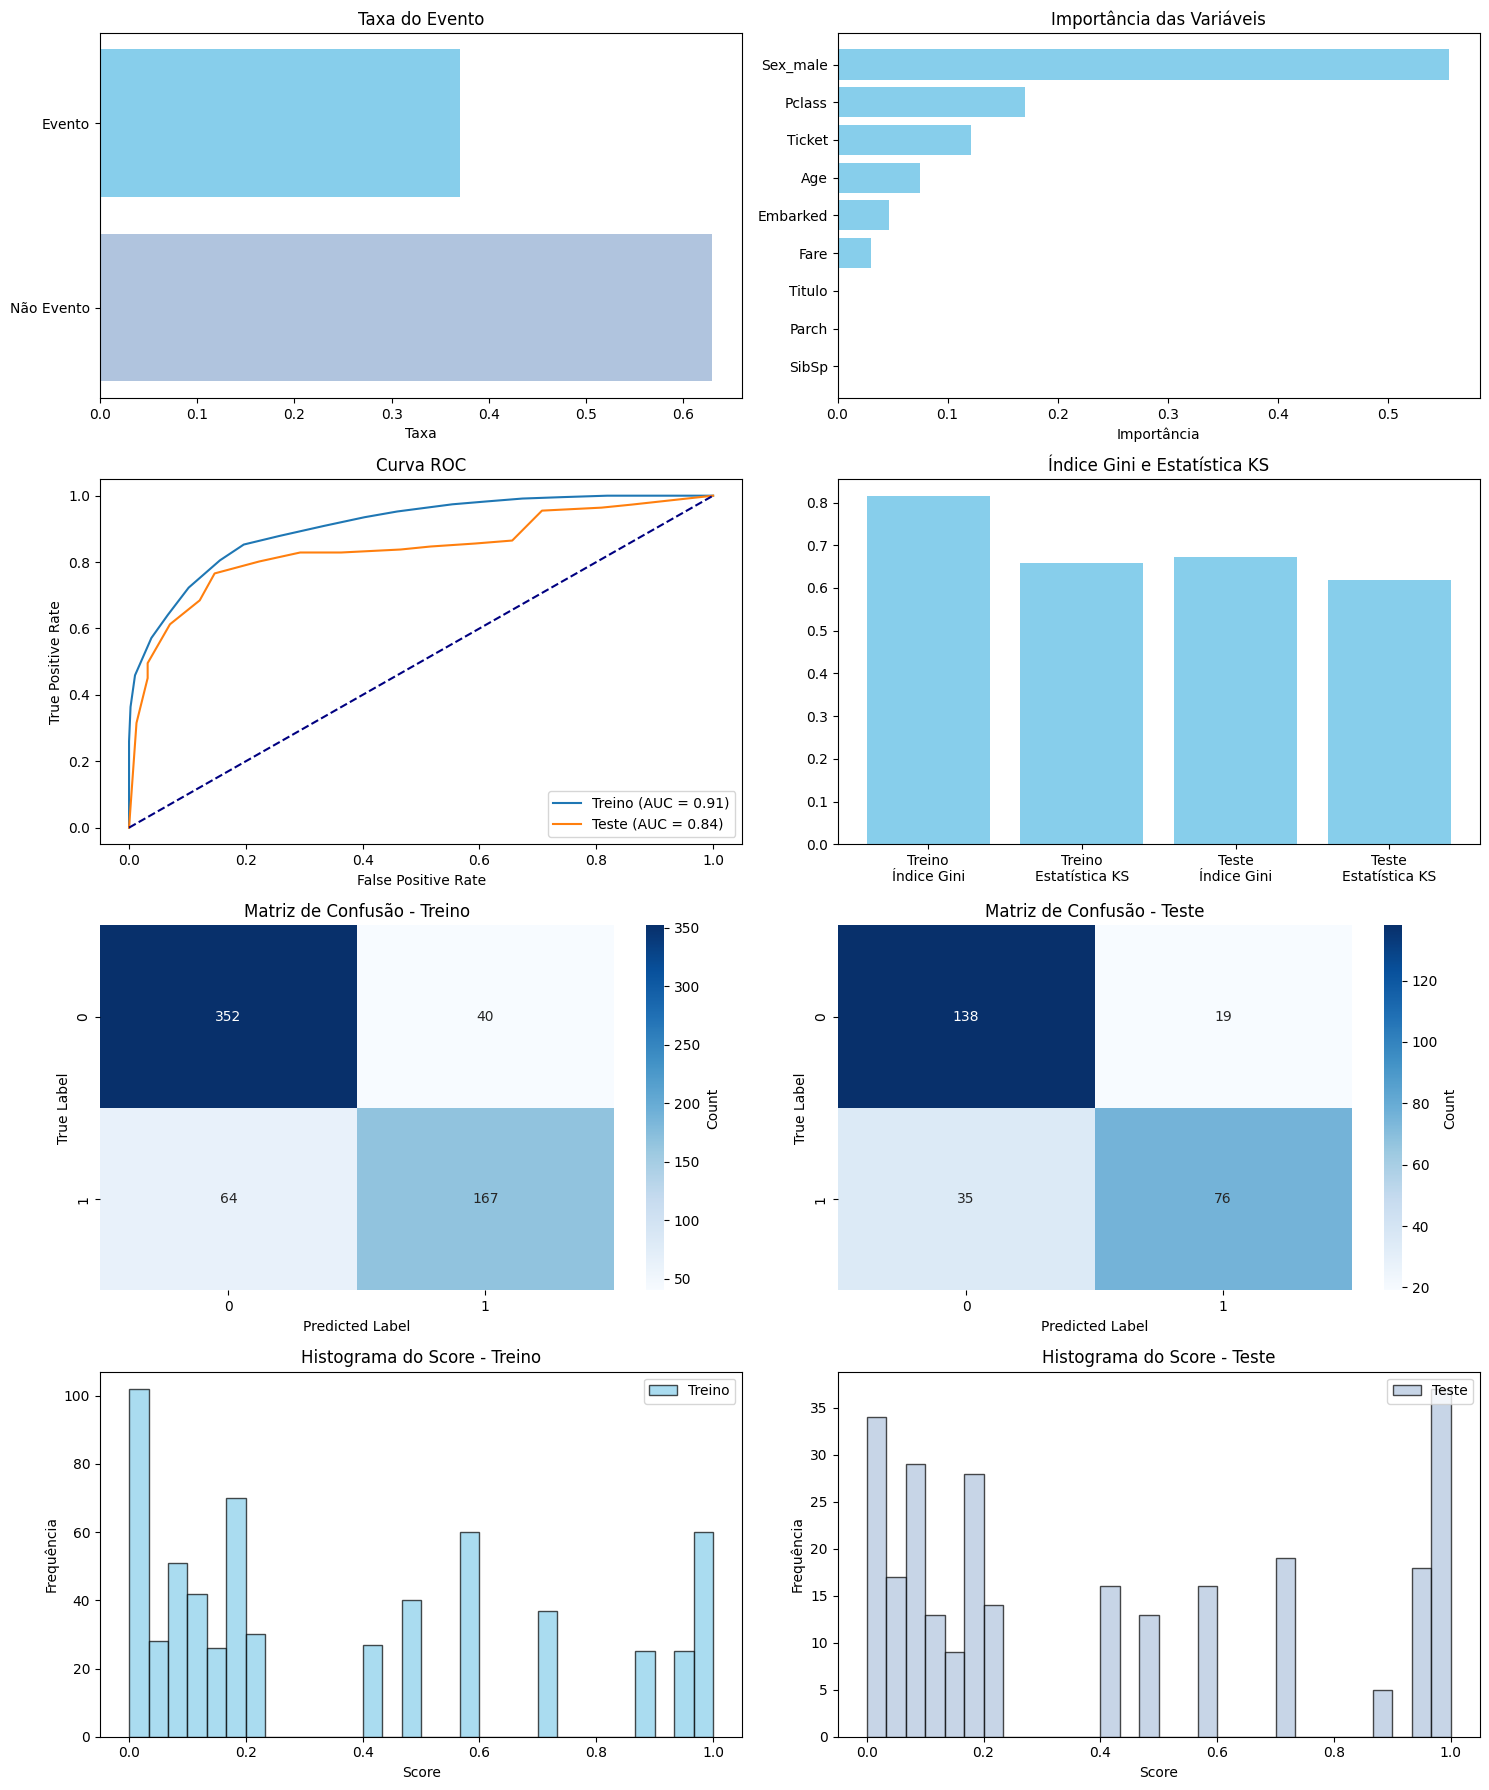

In [ ]:
features = np.array(X_train.columns)
plot_metrics(best_model_dt, X_train, y_train, X_test, y_test,features)

#### Escorando tabelas com melhor modelo oriundo do Grid Search

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0


In [ ]:
# Vamos escorar a abt de treino e abt de teste
X_train['prediction_1'] = best_model_dt.predict_proba(X_train)[:, 1]
X_test['prediction_1'] = best_model_dt.predict_proba(X_test)[:, 1]


# Fazer o inner join pelo index
abt_train = X_train.join(abt_00[['Survived']], how='inner')
abt_test = X_test.join(abt_00[['Survived']], how='inner')
abt_train.shape,abt_test.shape


((623, 11), (268, 11))

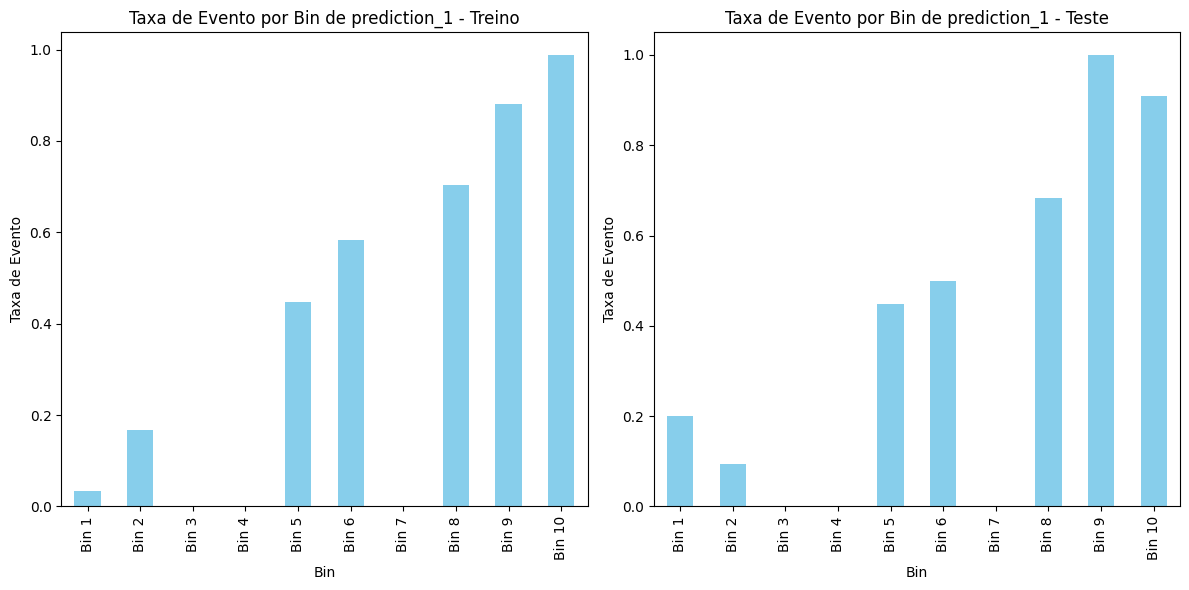

In [ ]:
plot_event_rate(abt_train, abt_test, 'prediction_1', 10, 'Survived')

#### Feature Engineering
- Vamos criar uma nova variável para ver se o modelo melhora
- Somar SibSp	com Parch que resulta em quantidade de parentes no navio

In [ ]:
X_train['QT_PARENTES']=X_train['SibSp']+X_train['Parch']
X_test['QT_PARENTES']=X_test['SibSp']+X_test['Parch']
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,QT_PARENTES
445,0.0,0.044986,0.000,0.333333,289,0.159777,3,0,1.0,0.333333
650,1.0,0.367921,0.000,0.000000,366,0.015412,3,3,1.0,0.000000
172,1.0,0.007288,0.125,0.166667,344,0.021731,3,2,0.0,0.291667
450,0.5,0.447097,0.125,0.333333,561,0.054164,3,3,1.0,0.458333
314,0.5,0.535059,0.125,0.166667,571,0.051237,3,3,1.0,0.291667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definindo o modelo
model = DecisionTreeClassifier(random_state=42)


############### Para lembrar os parâmetros da árvore ###########################
# model_dt = DecisionTreeClassifier(
#     criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
#     splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
#     max_depth=3,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
#     min_samples_split=0.2,  # Número mínimo de amostras necessárias para dividir um nó interno.
#     min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
#     min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
#     max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
#     random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
#     max_leaf_nodes=None,  # Número máximo de nós folha.
#     min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
#     class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
# )
################################################################################


# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2,3,4,7,10], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04,0.07, 0.1], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04,0.07,0.1], # Número mínimo de amostras necessárias para estar em um nó folha.
}

# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_dt = grid.best_estimator_

Total de Modelos a serem Treinados: 3000
Melhores Parâmetros:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 0.04, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor AUC:  0.8642975762942038


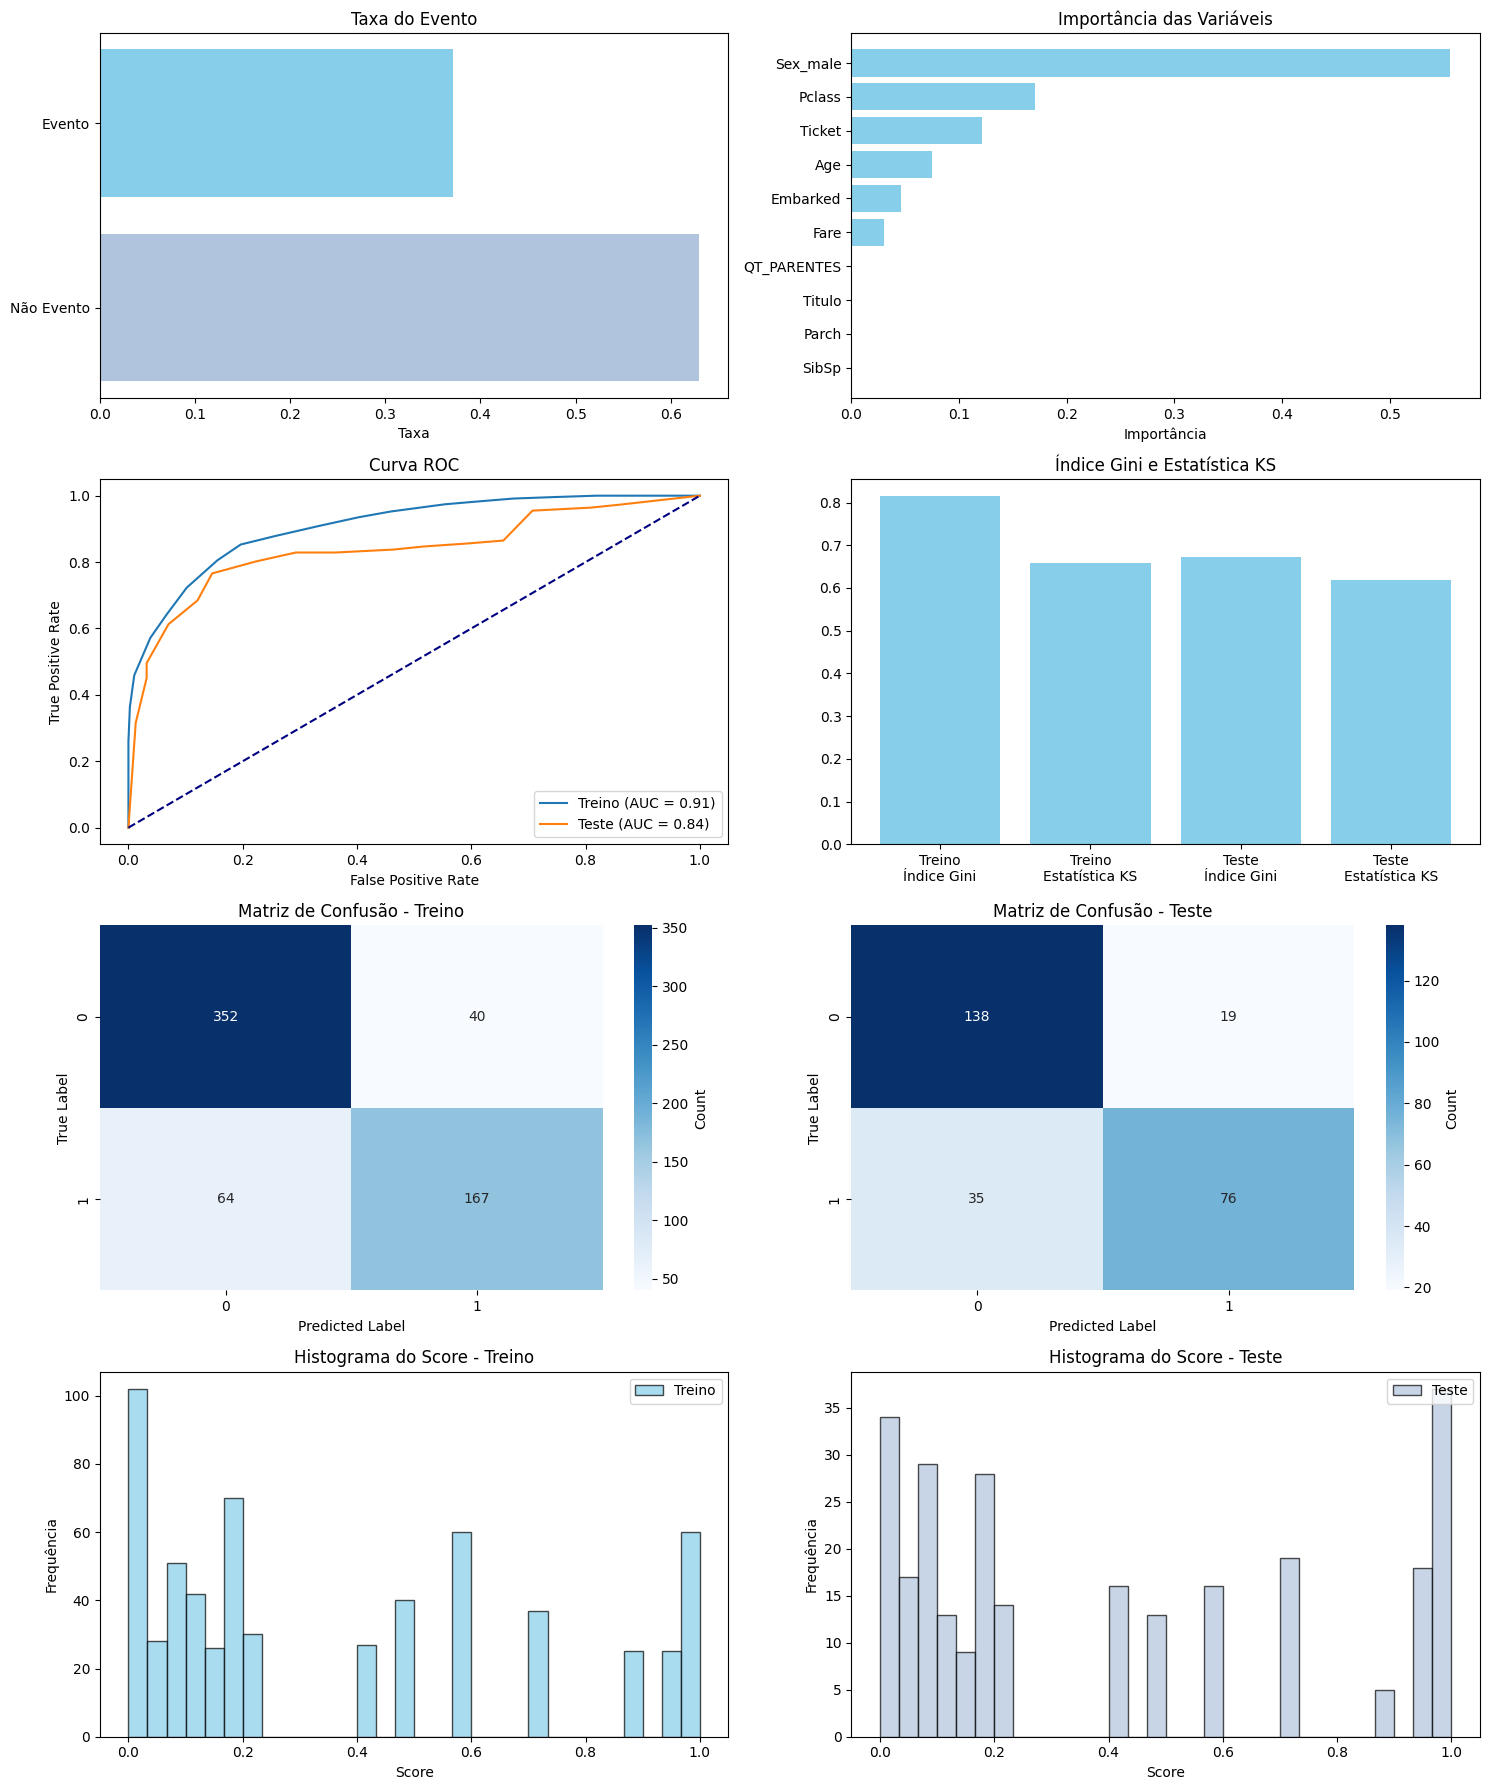

In [ ]:
features = np.array(X_train.columns)
plot_metrics(best_model_dt, X_train, y_train, X_test, y_test,features)

In [ ]:
# Vamos escorar a abt de treino e abt de teste
X_train['prediction_1'] = best_model_dt.predict_proba(X_train)[:, 1]
X_test['prediction_1'] = best_model_dt.predict_proba(X_test)[:, 1]


# Fazer o inner join pelo index
abt_train = X_train.join(abt_00[['Survived']], how='inner')
abt_test = X_test.join(abt_00[['Survived']], how='inner')
abt_train.shape,abt_test.shape

((623, 12), (268, 12))

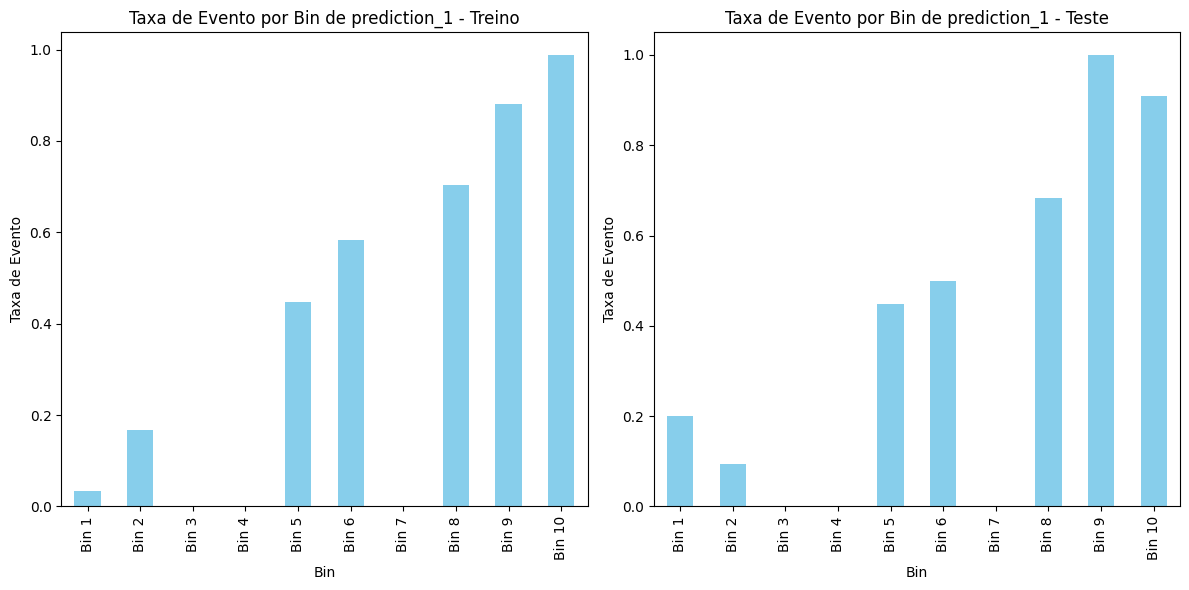

In [ ]:
plot_event_rate(abt_train, abt_test, 'prediction_1', 10, 'Survived')

#### Salvando melhor modelo (artefato para deployment)

In [ ]:
from joblib import dump

# Suponha que 'grid' é o seu objeto GridSearchCV já ajustado

# Salvando o melhor modelo encontrado pelo GridSearchCV
best_model = grid.best_estimator_
dump(best_model_dt, 'best_model_20230924.pkl')

['best_model_20230924.pkl']

In [ ]:
#### Lendo modelo salvo

from joblib import load

# Carregando o modelo
loaded_model = load('best_model_20230924.pkl')

loaded_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=0.04,
                       min_samples_split=0.008, random_state=42)